# 美しい地図を作りましょう

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/better maps.jpg">

matplotlib を使用してマップを作成する方法を学習しました。 このラボでは、マップ フィーチャの変更、ベースマップの追加、タイトルの作成などにより、これらのマップをさらに磨き上げる方法を学びます。

*注意

matplotlib には日本語フォント表示に関する問題があります。 Mac と PC のどちらを使用しているかに応じて、以下の適切なフォント ファミリを設定してください。

In [1]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')


## Get data

まずはe-Statのサイトにアクセス。そこから次に手順でデータをダウンロードして今週のフォルダーに入れる：

➡️ https://www.e-stat.go.jp/

➡️ 地図

➡️ 統計データダウンロード

➡️ 境界データ

➡️ 小地域

➡️ 国勢調査

➡️ 2020年

➡️ 小地域（基本単位区）（JGD2000）

➡️ 世界測地系緯度経度・Shapefile

➡️ 12 千葉県

➡️ 12217 柏市

In [2]:
gdf = gpd.read_file('B002005212020DDSWC12217.zip')

### チャレンジ問題
次は`gdf`変数に入れたデータを自分でコマンドを入力してexploreしましょう。
- `gdf.info()` get information about the data
- `gdf.plot()` make a quick map of the data
- `gdf.head()` see the first 5 rows of the data

In [3]:
# get information


In [4]:
# quick map of the data


In [5]:
# show the first 5 rows


このデータを「丁目」でまとめたいのでテーブルの中の丁目を示す「S_NAME」でグループ化してsumします。

In [6]:
# dissolve by S_NAME and sum fields 
gdf = gdf.dissolve(by='S_NAME',aggfunc='sum').reset_index()

### `subplots()`を使ってマップ作りのオプションを増やそう
ではとりあえずシンプルにマップを`subplots()` and `fig,ax`という変数を使って作ろう。このアプローチはmatplotlibでよく使われ、複数のマップを同時に作りたい時に後々役に立ちます。今のうちに覚えておくと良い！

<Axes: >

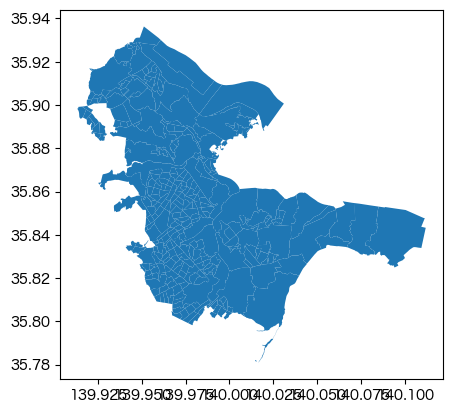

In [7]:
# simple map of the data using subplots
fig,ax = plt.subplots()
gdf.plot(ax=ax)

データには既に「JINKO」のカラムがあるので、これを使ってコロプレス（choropleth）マップを作ろう。
- `column='JINKO'`
- `legend=True`

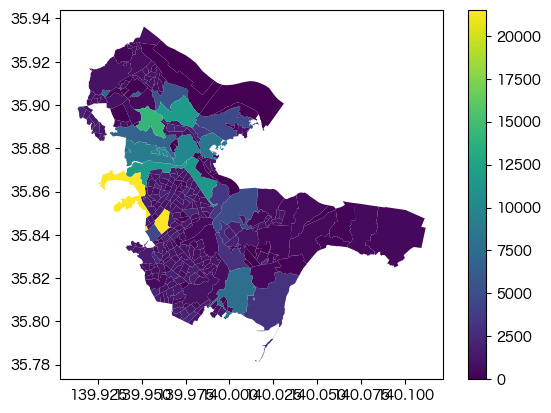

In [8]:
# population map
fig,ax = plt.subplots()
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

## Size

マップのサイズを変更
- `figsize=(10,10)`

2 つの数字はマップの幅と高さを示しますが、マップされるデータの形状に応じてサイズが変化する可能性があります。

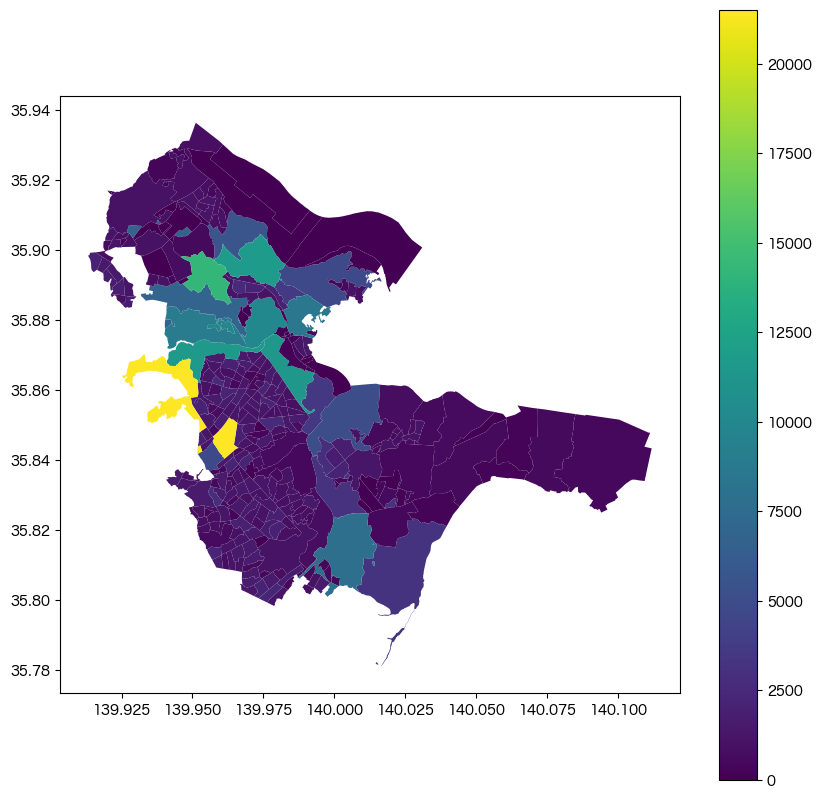

In [9]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True);

## Color

`cmap` 引数を設定して、次の選択肢からコロプレス マップのカラー パレットを割り当てることができます。なお、色の方向を変えるには `_r` を付け加えればいい。

例：　
- `cmap='autumn'`
- `cmap='autumn_r'`

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_002.webp">
<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_003.webp">
<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/sphx_glr_colormaps_004.webp">

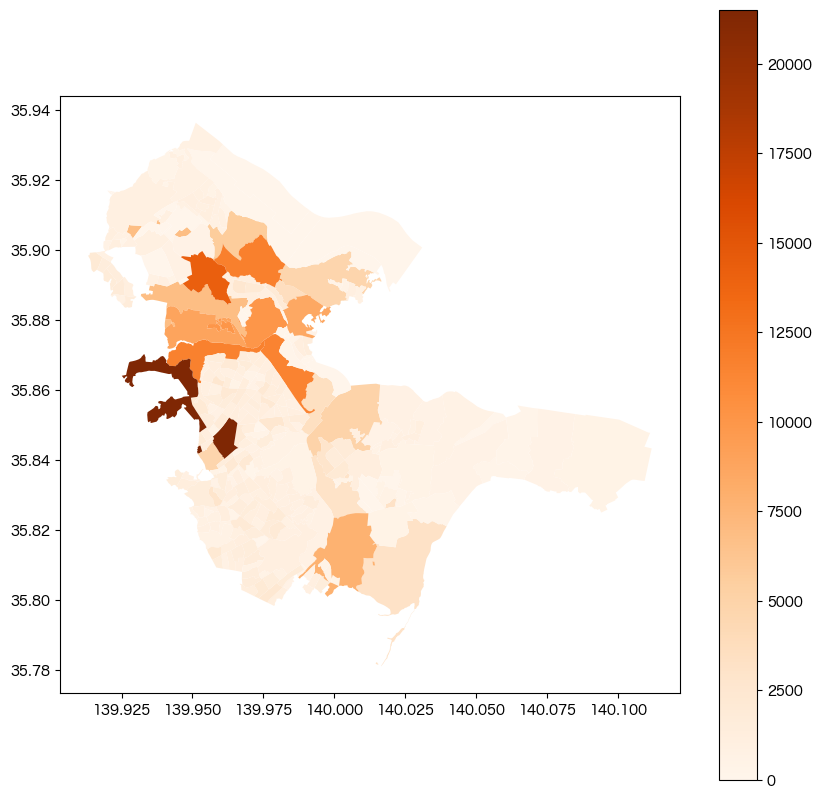

In [10]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Oranges');

## Lines

次の引数を使用して、ポリゴンの境界線の幅と色を変更できます。

- `edgecolor='black'`
- `linewidth=0.1`

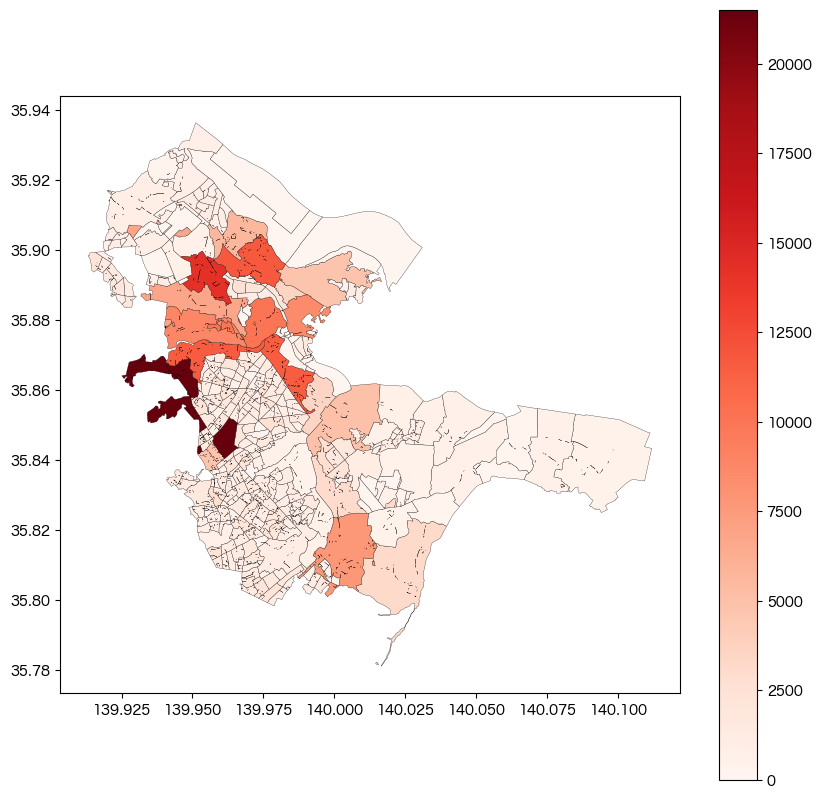

In [11]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.2);

## Hide Axes

軸を非表示にするには、コード内に新しい行を作成し、`ax` 変数にアクセスする必要があります。

- `ax.axis('off')`


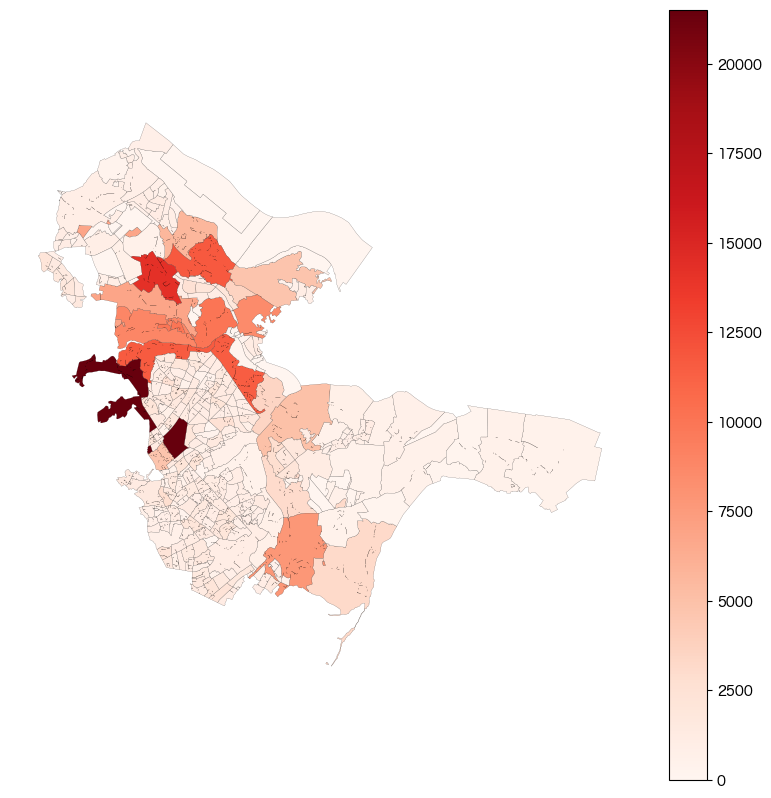

In [12]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1);

# hide axes
ax.axis('off');

## Legend options

凡例、デカくない？ラベルは？下にできない？と思ったら、オプションを足してみよう！

- `legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}`


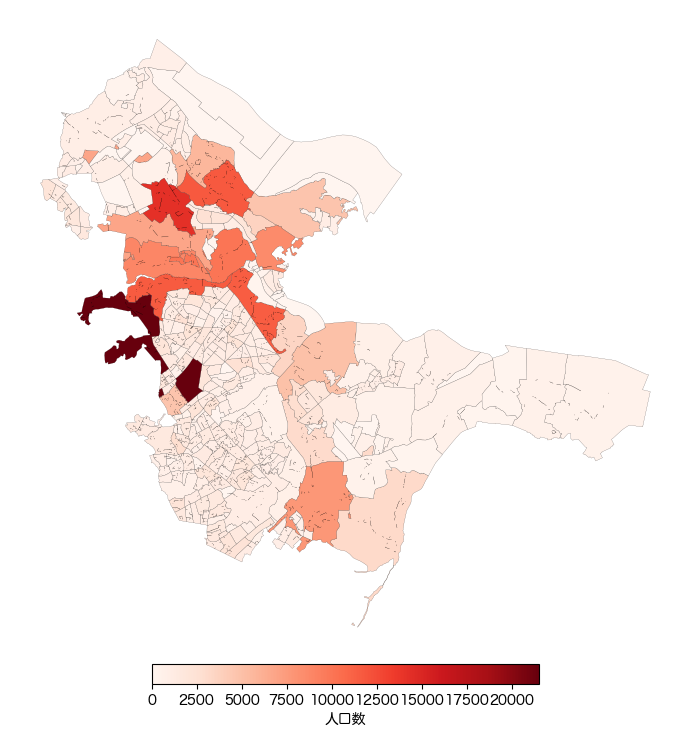

In [13]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off');

## Title

マップのタイトルを設定するには、`ax` 変数を参照する別のコード行を追加する必要があります。

なお、日本語フォントの設定する必要があるのでMACかPCによって違うので注意：

Windows PC:
- `ax.set_title('柏市の人口',fontsize=24, fontname='MS Gothic');`

Mac:
- `ax.set_title('柏市の人口',fontsize=24, fontname='Hiragino Maru Gothic Pro');`

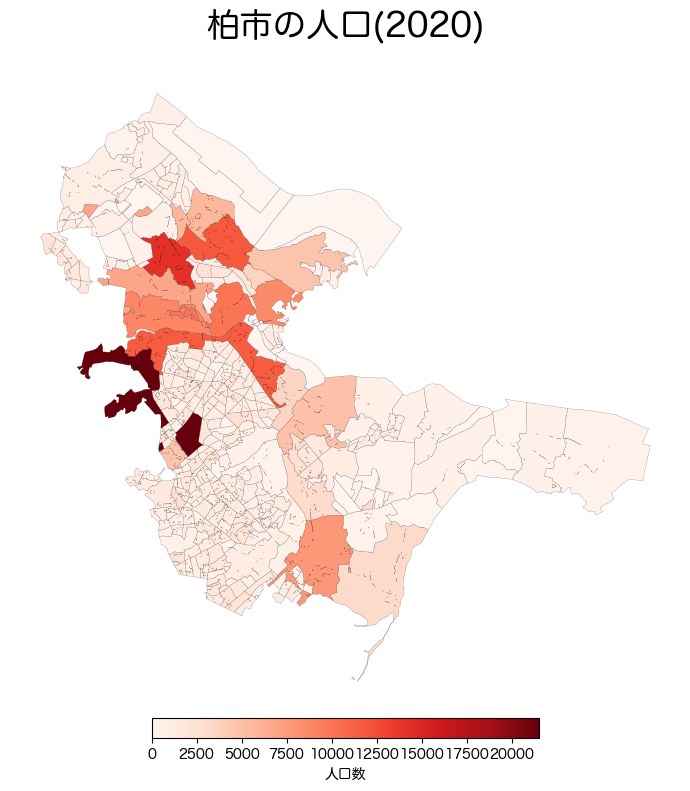

In [14]:
# population map
fig,ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)',fontsize=24, pad=20);

## Basemap

ベースマップを足すには複数のステップが必要となる。

まずはベースマップを提供しているモジュール【contextily】をimportする。

In [15]:
import contextily as cx

次はデータをcontextilyがサポートしている地図投影法に変換する必要がある。

え？地図投影法とは？

## Projections

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/projections.png">

https://www.esrij.com/gis-guide/coordinate-and-spatial/coordinate-system/


https://ja.wikipedia.org/wiki/%E5%9C%B0%E5%9B%B3%E6%8A%95%E5%BD%B1%E6%B3%95%E3%81%AE%E4%B8%80%E8%A6%A7

緯度経度 (latitude,longitude) で表されているデータの地理座標系のcrs番号は `4326`だがcontextilyのベースマップは【Web メルカトル】という投影座標系を使っていて、その crs番号は `3857` である。

In [16]:
# change projection for your data to match basemap
gdf=gdf.to_crs(3857)

## Basemap options

<img src="https://raw.githubusercontent.com/yohman/23-1-Reitaku-GIS/main/Weeks/Week09/images/basemaps.jpg">

- source='https://cyberjapandata.gsi.go.jp/xyz/std/{z}/{x}/{y}.png'
- source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg'
- source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png'
- source='https://cyberjapandata.gsi.go.jp/xyz/blank/{z}/{x}/{y}.png'


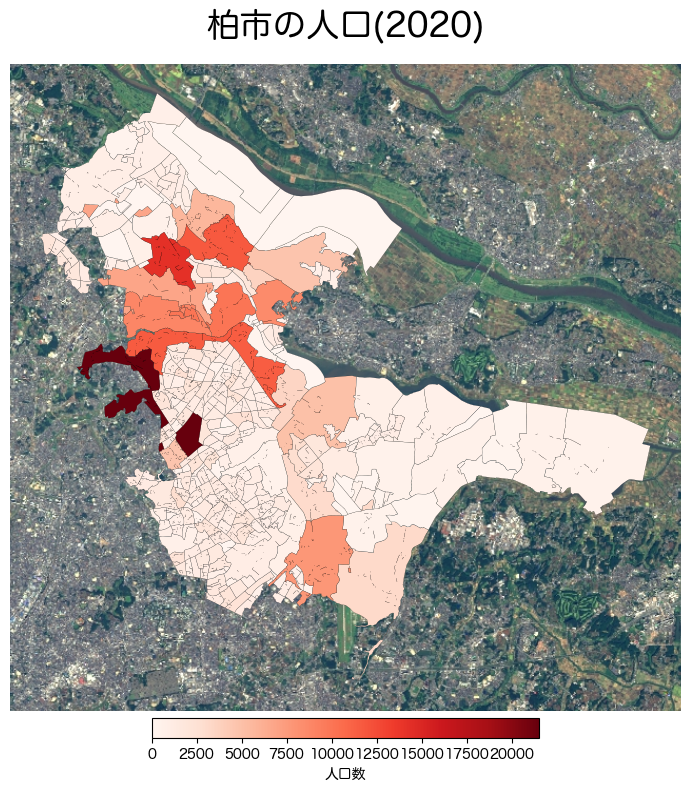

In [17]:
# population map
fig,ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         legend_kwds={'label': "人口数",'shrink': 0.5, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)',fontsize=24, pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg');

## Transparency

コロプレス レイヤーに少し透明度を追加して、ベースマップ上にシームレスに「浮かせる」ことができます。

- `alpha=0.8`

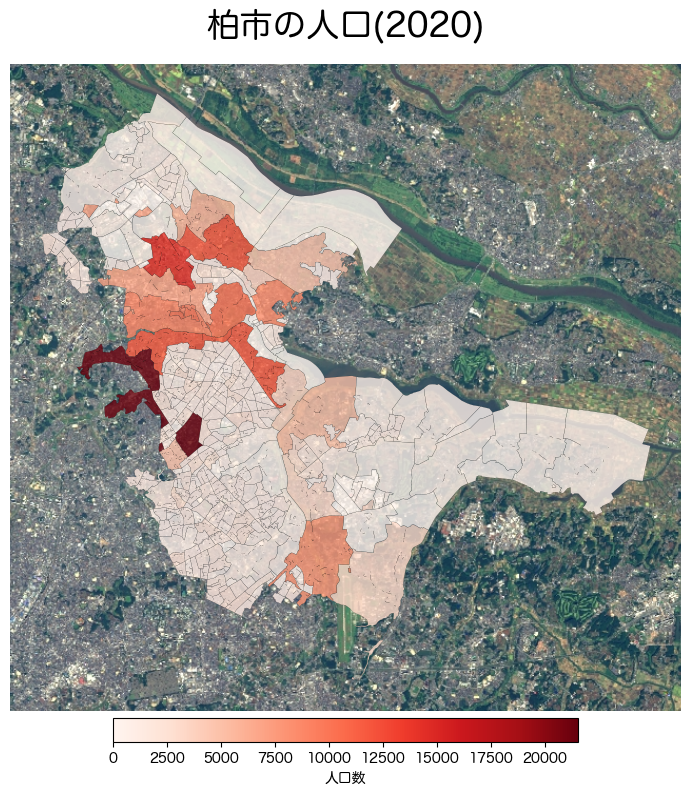

In [18]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# title
ax.set_title('柏市の人口(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg');


## Labels

ちょっと高度なテクニックだが、以下のようにトップ１０人口が高い場所のラベルをつける。

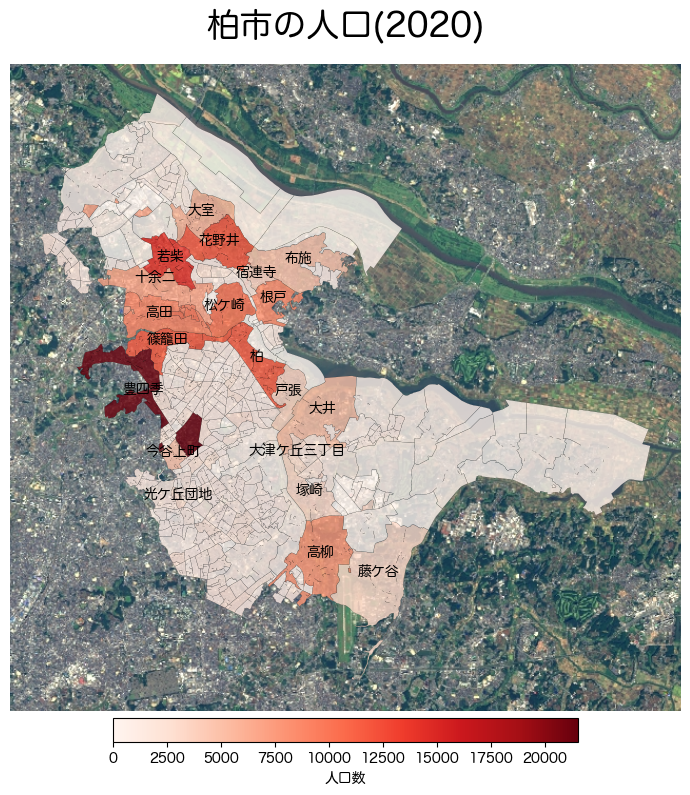

In [19]:
# population map
fig, ax = plt.subplots(figsize=(10,10))

gdf.plot(ax=ax,
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )

# hide axes
ax.axis('off')

# Sort the dataframe by JINKO in descending order
gdf_sorted = gdf.sort_values('JINKO', ascending=False)

# Get the top 10 rows
top_10 = gdf_sorted.head(20)

# Label the polygons with the top 10 highest JINKO values
for idx, row in top_10.iterrows():
    ax.annotate(row['S_NAME'], (row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# title
ax.set_title('柏市の人口(2020)', fontsize=24,pad=20)

# Add the basemap
ctx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')


# Exercise

「SETAI」を示す地図を作成しましょう。 それに応じてタイトルを変更してください。 マップのさまざまな色を試してください。

In [20]:
# create your SETAI map



## Advanced topics
Two side-by-side maps

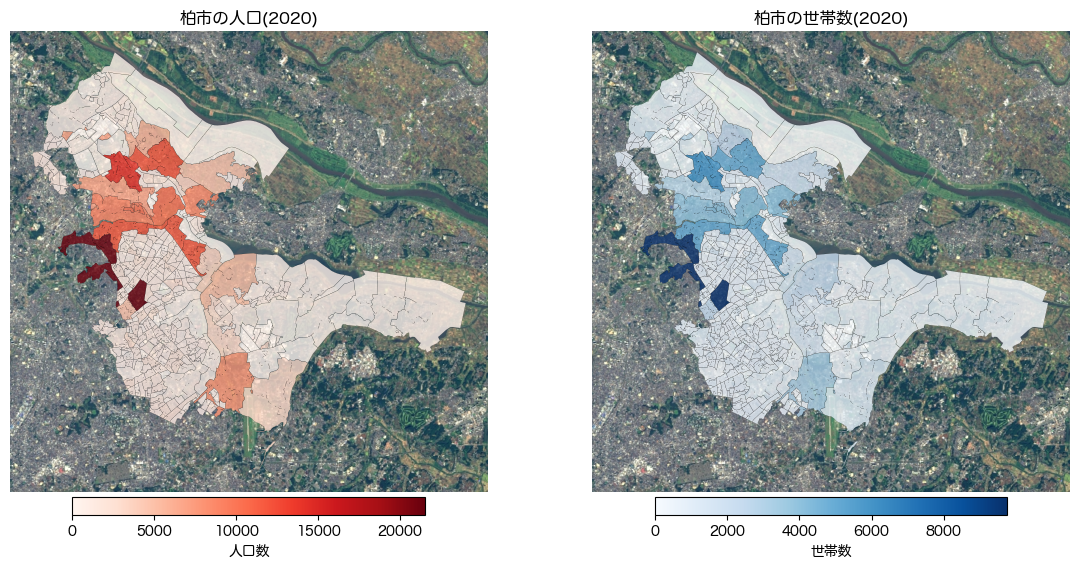

In [21]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first map on the left subplot
gdf.plot(ax=axs[0],
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )
axs[0].axis('off')
axs[0].set_title('柏市の人口(2020)', fontsize=12)

# Plot the second map on the right subplot
gdf.plot(ax=axs[1],
         column='SETAI',
         legend=True,
         cmap='Blues',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "世帯数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )
axs[1].axis('off')
axs[1].set_title('柏市の世帯数(2020)', fontsize=12)

# Add the basemap to both subplots
ctx.add_basemap(axs[0], source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')
ctx.add_basemap(axs[1], source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


TypeError: Legend.__init__() got an unexpected keyword argument 'label'

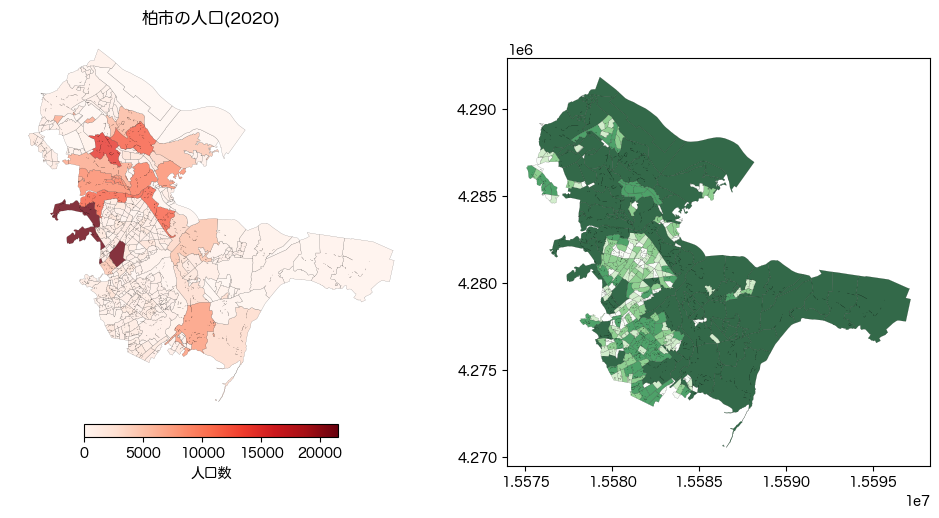

In [23]:
# Create a figure with two subplots
fig, axs = plt.subplots(1,2, figsize=(12, 6))

# Plot the first map on the left subplot
gdf.plot(ax=axs[0],
         column='JINKO',
         legend=True,
         cmap='Reds',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         legend_kwds={'label': "人口数",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )
axs[0].axis('off')
axs[0].set_title('柏市の人口(2020)', fontsize=12)

# Plot the second map on the right subplot as an area map
gdf.plot(ax=axs[1],
         column='AREA',
         legend=True,
         cmap='Greens',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         # use quantiles
         scheme='quantiles',
         legend_kwds={'label': "面積",'shrink': 0.6, 'orientation': "horizontal", 'pad': 0.01}
         )
axs[1].axis('off')
axs[1].set_title('柏市の面積(2020)', fontsize=12)

# Add the basemap to both subplots
ctx.add_basemap(axs[0], source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')
ctx.add_basemap(axs[1], source='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


# GISクラスの最終プロジェクト課題（Python使用）

## 概要：

最終プロジェクトとして、Pythonを使用してデジタルマップを作成する。トピックは自由に選べますが、GISの基本原則に従った内容とし、基本的な地図要素を含める必要がある。

興味のあるトピックを選び、空間データの分析または可視化を含めてください。

トピックの例としては以下が挙げられます：
- 複数の都市の人口統計を比較する
- 都市の犯罪事件のマッピング
- 時間経過による人口密度の変化の可視化
- 環境影響評価
- 都市開発の分析
- 自然災害リスクマッピング

## 来週提出するもの:

最終トピックのテーマを記載した Jupyter ノートブック。トピックをできるだけ詳しく記載し、マップの作成に使用するデータ ソースのリストと、作成するマップの種類に関する予備的なアイデアを記載します。

最後に、トピック領域の場所を示すマップを作成する。